<a href="https://colab.research.google.com/github/NTsering/housing-price/blob/master/NLP_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressing using a multilayered 1D Convolution Network in Pytorch 

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import quantile_transform

In [0]:
dataset = pd.read_csv('/content/drive/My Drive/NLP/Housing/dataset/housing.csv')

In [4]:
dataset.shape

(20640, 10)

In [0]:
dataset = dataset.dropna()

In [6]:
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [6]:
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
c = pd.plotting.scatter_matrix(dataset, alpha=0.2, figsize=(17, 17), diagonal='hist')

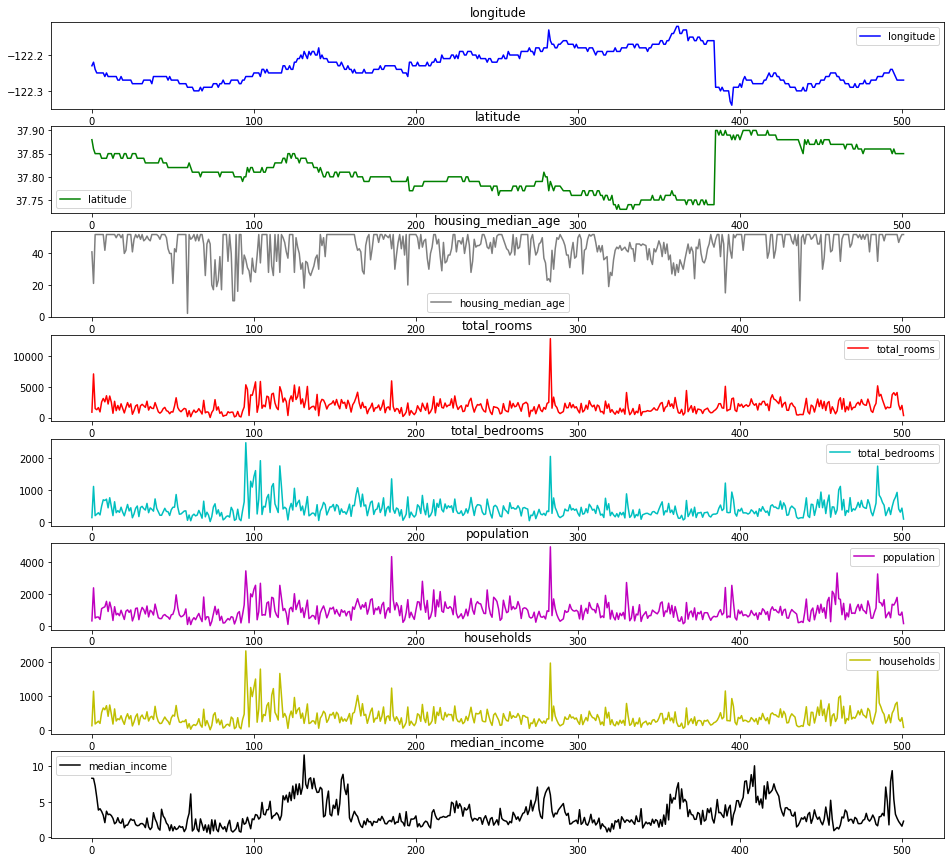

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,15))
color = ['b', 'g', '#7f7f7f', 'r', 'c', 'm', 'y', 'k']
for i in range(8):
  plt.subplot(8,1, i+1)
  a, = plt.plot(dataset.iloc[0:500,i],color= color[i], label = dataset.columns[i] )
  plt.title(dataset.columns[i])
  plt.legend(handles = [a])

plt.show()


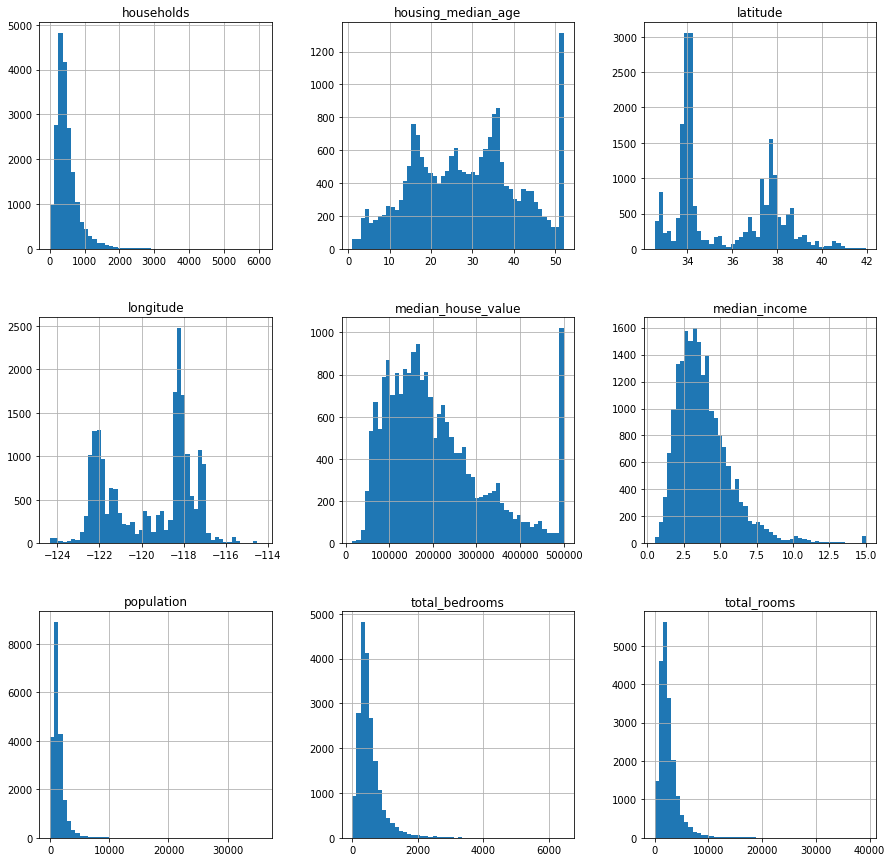

In [10]:
dataset.hist(bins=50, figsize=(15,15))
plt.show()

In [0]:
# To prdict the mdian house value'
Y = dataset['median_house_value']
X = dataset.loc[:, 'longitude':'median_income']

In [0]:
# X = quantile_transform(X, n_quantiles=10, random_state=0, copy=True).squeeze()
# Y = quantile_transform(Y.values.reshape(-1,1), n_quantiles=10, random_state=0, copy=True).squeeze()

In [10]:
print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [0]:
# from sklearn import preprocessing
# convert = preprocessing.MinMaxScaler()

In [0]:
# X = convert.fit_transform(X.values)
# Y = convert.fit_transform(Y.values.reshape(-1,1)).flatten() 

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size = 0.3, shuffle = True, random_state = 2003)

x_train_np = x_train.to_numpy()
y_train_np = y_train.to_numpy()

x_test_np = x_test.to_numpy()
y_test_np = y_test.to_numpy()

In [0]:
# x_train_np = x_train
# y_train_np = y_train

# x_test_np = x_test
# y_test_np = y_test

In [16]:
print(type(x_train_np))
print(type(y_train_np))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [0]:
import torch # Pytorch Library
from torch.nn import Conv1d # 1D Convolution Layer
from torch.nn import MaxPool1d # Max pooling Layer
from torch.nn import Flatten #Flatten Layer 
from torch.nn import Linear # As dense FC NN
from torch.nn.functional import relu
from torch.utils.data import DataLoader, TensorDataset # DataLoader: Bach size, Shuffle

In [0]:
from torch.nn.functional import tanh, dropout
from torch.nn import AvgPool1d
from torch.nn import BatchNorm1d

In [0]:
#@title Default title text
class CnnRegressor(torch.nn.Module):
  def __init__(self, batch_size, inputs, outputs):
    super(CnnRegressor, self).__init__()
    self.batch_size = batch_size
    self.inputs = inputs
    self.outputs =outputs

    self.input_layer = Conv1d(inputs, batch_size, 1, padding=0)

    self.max_pooling_layer = MaxPool1d(1) # Constructor value:  Kernel size = 1

    self.conv_layer = Conv1d(batch_size, 64, 1)

    self.bn = BatchNorm1d(num_features=64)

    self.avg_pooling_layer = AvgPool1d(1)

    self.conv_layer2 = Conv1d(64, 64, 1)

    self.conv_layer3 = Conv1d(64, 64, 1)

    self.flatten_layer = Flatten()

    self.liner_layer = Linear(64, 64)

    self.liner_layer2 = Linear(64, 64)

    self.liner_layer3 = Linear(64, 64)

    # self.liner_layer4 = Linear(50, 50)

    self.output_layer = Linear(64, outputs)

  def feed(self, input):

    input = input.reshape((self.batch_size, self.inputs, 1))  #single dimension for tabular data (expects 3D data(image))

    output = relu(self.bn(self.input_layer(input)))

    # output = self.max_pooling_layer(output)

    output = relu(self.conv_layer(output))

    output = self.max_pooling_layer(output)

    output = relu(self.conv_layer2(output))

    # output = self.max_pooling_layer(output)

    output = relu(self.conv_layer3(output))
    
    # output = self.max_pooling_layer(output)

    output = self.avg_pooling_layer(output)

    output = self.flatten_layer(output)

    output = (self.liner_layer(output))

    output = (self.liner_layer2(output))

    output = (self.liner_layer3(output))

    # output = relu(self.liner_layer4(output))

    output = (self.output_layer(output))

    return output



In [16]:
from torch.optim import SGD # Stochaistic gradien descent package
from torch.optim import Rprop
from torch.optim import Adam
from torch.nn import L1Loss
!pip install pytorch-ignite
from ignite.contrib.metrics.regression.r2_score import R2Score

     |████████████████████████████████| 112kB 8.6MB/s 


In [42]:
batch_size = 64
model = CnnRegressor(batch_size, X.shape[1], 1) # Parameter 1?
model.cuda()


CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avg_pooling_layer): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (conv_layer2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (conv_layer3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (liner_layer): Linear(in_features=64, out_features=64, bias=True)
  (liner_layer2): Linear(in_features=64, out_features=64, bias=True)
  (liner_layer3): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
)

In [19]:
sum([param.nelement() for param in model.parameters()])

25729

In [0]:
def model_loss(model, dataset, train = False, optimizer = None):
  performance = L1Loss()
  score_metric = R2Score()

  avg_loss = 0
  avg_score = 0
  count = 0

  for input, output in iter(dataset):
    predictions = model.feed(input) # Get the model's predictions for the training dataset

    loss = performance(predictions, output) #Get the model's loss

    score_metric.update([predictions, output]) #Get the model's R2 score
    score = score_metric.compute()

    if(train):
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
    avg_loss += loss.item()
    avg_score += score
    count += 1
  
  return avg_loss/count, avg_score/count


In [0]:
import matplotlib.pyplot as plt
from torch.optim import RMSprop
from time import time

In [43]:
epochs = 100

optimizer = Rprop(model.parameters(), lr = 1e-6 )
# optimizer = SGD(model.parameters(), lr = 1e-7)
# optimizer = Adagrad(model.parameters(), lr= 1e-5)
# optimizer = Adam(model.parameters(), lr = 1e-6 )
# optimizer = RMSprop(model.parameters(), lr = 1e-6 )

inputs = torch.from_numpy(x_train_np).cuda().float()
outputs = torch.from_numpy(y_train_np.reshape(y_train_np.shape[0], 1)).cuda().float()

tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

loss = []
score = []
for epoch in range(epochs):
  # optimizer = Rprop(model.parameters(), lr = 1e-5 /10 )
  avg_loss, avg_r2_score = model_loss(model, loader, train = True, optimizer=optimizer)
  loss.append(avg_loss)
  score.append(avg_r2_score)
  print('\rEpoch: %d,\tLoss = %d  R2 Score = %f' %(epoch+1, avg_loss, avg_r2_score ), end="")


Epoch: 100,	Loss = 51961  R2 Score = 0.636951

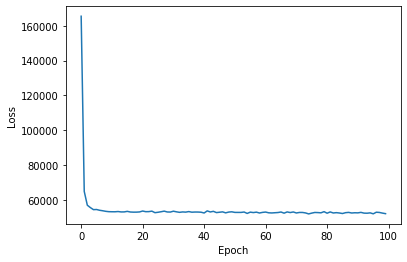

In [47]:

plt.plot(loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

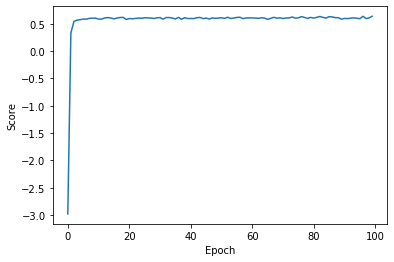

In [48]:
plt.plot(score)
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

In [49]:
inputs = torch.from_numpy(x_test_np).cuda().float()
outputs = torch.from_numpy(y_test_np.reshape(y_test_np.shape[0], 1)).cuda().float()
tensor = TensorDataset(inputs, outputs)
loader = DataLoader(tensor, batch_size, shuffle=True, drop_last=True)

# for epoch in range(epochs):
tic = time()
avg_loss, avg_r2_score = model_loss(model, loader, train = False)
print("Inference completed in {:.3f}s for all tests".format(time() - tic))

print("Loss = " + str(avg_loss) + " R2 Score = " + str(avg_r2_score))

Inference completed in 0.373s for all tests
Loss = 51953.86308856502 R2 Score = 0.6095851564813946


In [51]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 CnnRegressor(
  (input_layer): Conv1d(8, 64, kernel_size=(1,), stride=(1,))
  (max_pooling_layer): MaxPool1d(kernel_size=1, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv_layer): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (bn): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avg_pooling_layer): AvgPool1d(kernel_size=(1,), stride=(1,), padding=(0,))
  (conv_layer2): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (conv_layer3): Conv1d(64, 64, kernel_size=(1,), stride=(1,))
  (flatten_layer): Flatten()
  (liner_layer): Linear(in_features=64, out_features=64, bias=True)
  (liner_layer2): Linear(in_features=64, out_features=64, bias=True)
  (liner_layer3): Linear(in_features=64, out_features=64, bias=True)
  (output_layer): Linear(in_features=64, out_features=1, bias=True)
) 

The state dict keys: 

 odict_keys(['input_layer.weight', 'input_layer.bias', 'conv_layer.weight', 'conv_layer.bias', 'bn.weight', 'bn.bias', 'bn.runni

In [50]:
PATH = '/content/drive/My Drive/NLP/Housing/1104377_1dconv_reg'
torch.save(model, PATH)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:360: UserWarning: Couldn't retrieve source code for container of type CnnRegressor. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


---
## Comparison with other Popular  Machine Learning Models


---



In [0]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline
from sklearn.datasets import fetch_california_housing
from time import time

In [53]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

In [54]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,
                                                    random_state=0)

In [0]:
est = make_pipeline(QuantileTransformer(),
                    MLPRegressor(hidden_layer_sizes=(50, 50),
                                 learning_rate_init=0.01,
                                 early_stopping=True))

In [58]:

est.fit(X_train, y_train)
print("Train R2 score: {:.3f}".format(est.score(X_train, y_train)))
tic = time()
print("Test R2 score: {:.3f}".format(est.score(X_test, y_test)))
print("Inference done in {:.3f}s".format(time() - tic))

Train R2 score: 0.805
Test R2 score: 0.801
Inference done in 0.008s


In [0]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [0]:
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
print('Train R2 Score: ', reg_model.score(x_train, y_train))
print('Test R2 Score: ',reg_model.score(x_test, y_test))

Train R2 Score:  0.6510980849930272
Test R2 Score:  0.6295318494573605


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
regr = RandomForestRegressor(max_depth=8)
regr.fit(x_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
print('Train R2 Score: ', regr.score(x_train_np, y_train_np))

Train R2 Score:  0.8130248603398238


In [0]:
print('Test R2 score: ', regr.score(x_test_np, y_test_np))

Test R2 score:  0.7324986314881196
